Parte 1 - Leitura e empilhamento das bandas

In [5]:
import numpy as np
from spectral import imshow, save_rgb
import functools
import matplotlib.pyplot as plt
from osgeo import gdal

b2 = gdal.Open('L71221071_07120010720_DN_2.tif')
b4 = gdal.Open('L71221071_07120010720_DN_4.tif')
b7 = gdal.Open('L71221071_07120010720_DN_7.tif')

B2 = b2.ReadAsArray()
B4 = b4.ReadAsArray()
B7 = b7.ReadAsArray()
l = [B2,B4,B7]
stack = np.dstack(l)

Parte 2 - Calculando a descorrelação

<ipython-input-6-82d16469a095>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  stack = stack.reshape((-1,3)).astype(np.float)


ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [70.48484970697098, 130.68056614328648]
    G: [25.733109212953686, 112.11510537474727]
    B: [19.043787578087375, 116.74069707436104]

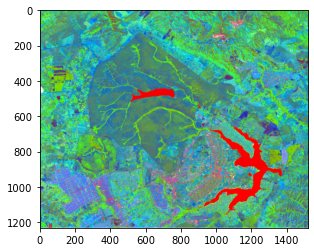

In [6]:
shape = stack.shape
stack = stack.reshape((-1,3)).astype(np.float)
cov = np.cov(stack.T)
sigma = np.diag(np.sqrt(cov.diagonal()))
eigval, v = np.linalg.eig(cov)
stretch = np.diag(1/np.sqrt(eigval))
media = np.mean(stack, axis=0)
stack -= media

transform = functools.reduce(np.dot, [sigma, v, stretch, v.T])
deslocamento = media - np.dot(media, transform)
stack = np.dot(stack, transform)
stack += media + deslocamento
descorr = stack.reshape(shape)

imshow(descorr, bands=(0,1,2), stretch=(0.02))

In [ ]:
save_rgb('descorr.jpeg',descorr, bands=(0,1,2), stretch=(0.02))#Salvando imagem em disco

Parte 3 - Visualizando descorrelação com gráficos (Demora um pouco...)

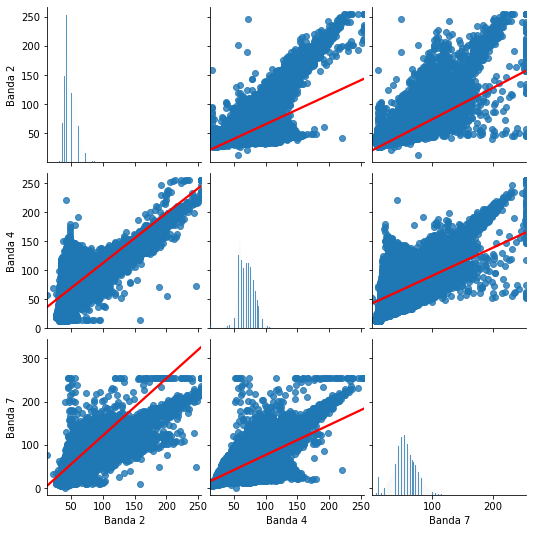

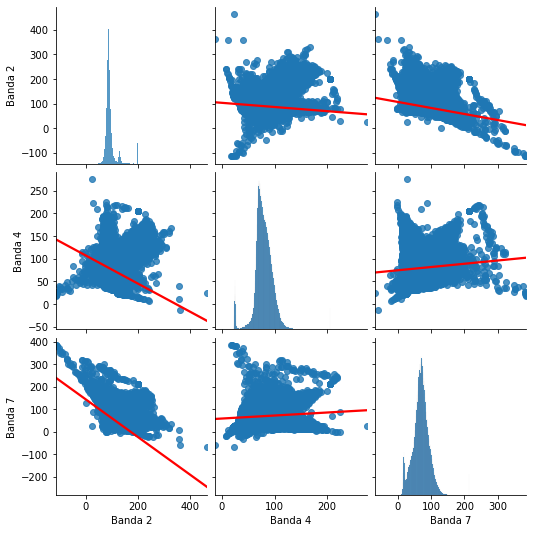

In [7]:
import pandas as pd
import seaborn as sns

stack = np.dstack(l)
Matriz1 = np.zeros((stack[:,:,0].size,3))
Matriz2 = np.zeros((descorr[:,:,0].size,3))
Bandnames = ['Banda 2','Banda 4','Banda 7']

for i in range(3): 
    vetor1 = stack[:,:,i].flatten()
    vetor2 = descorr[:,:,i].flatten()
    Matriz1[:,i] = vetor1
    Matriz2[:,i] = vetor2

cor = pd.DataFrame(Matriz1, columns = Bandnames)
des = pd.DataFrame(Matriz2, columns = Bandnames)

sns.pairplot(cor,kind='reg' ,plot_kws={'line_kws':{'color':'red'}})
sns.pairplot(des,kind='reg' ,plot_kws={'line_kws':{'color':'red'}})